<a href="https://colab.research.google.com/github/Ighus/ds_analisys_amazon_bestbuy_eletronics/blob/master/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index de colunas:

|Coluna  |Descição  |
|---|---|
|asins|The ASIN (Amazon identifier) used for this product.|
|brand |The brand name of this product. |
|categories |A list of category keywords used for this product across multiple sources. |
|colors |A list of colors available for this product. |
|count |The number of units included in the product packaging. Can include a description of the unit. |
|dateAdded |The date this product was first added to the product database. |
|dateUpdated |The most recent date this product was updated or seen by our system. |
|descriptions | |
| | |
| | |
| | |
| | |
| | |
| | |
| | |
| | |
| | |
| | |
| | |
| | |
| | |
| | |
| | |
| | |
| | |
| | |
| | |


In [1]:
import os
import zipfile

# Download do dataset
!gdown --id 18ED_53r5Psnn-CU-gfrXGji2Qp-dTqdR

# Extrator de arquivos
zip_ref = zipfile.ZipFile('./amazon-and-best-buy-electronics.zip', 'r')
zip_ref.extractall()
zip_ref.close()

Downloading...
From: https://drive.google.com/uc?id=18ED_53r5Psnn-CU-gfrXGji2Qp-dTqdR
To: /content/amazon-and-best-buy-electronics.zip
100% 3.77M/3.77M [00:00<00:00, 15.8MB/s]


In [51]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

folder_path_base = './amazon-and-best-buy-electronics'

In [52]:
data = pd.read_csv(f'{folder_path_base}/data/datafinitielectronicsproductdata.csv')

In [53]:
data['reviews_text'].iloc[0]

'This keyboard is very easy to type on, but the fingerprint reader is the best feature. It is very accurate and simplifies login.'

In [54]:
data.shape

(7299, 27)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7299 entries, 0 to 7298
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7299 non-null   object 
 1   asins                7299 non-null   object 
 2   brand                7299 non-null   object 
 3   categories           7299 non-null   object 
 4   colors               5280 non-null   object 
 5   dateadded            7299 non-null   object 
 6   dateupdated          7299 non-null   object 
 7   dimension            6090 non-null   object 
 8   ean                  2951 non-null   float64
 9   imageurls            7299 non-null   object 
 10  keys                 7299 non-null   object 
 11  manufacturer         4632 non-null   object 
 12  manufacturernumber   7299 non-null   object 
 13  name                 7299 non-null   object 
 14  primarycategories    7299 non-null   object 
 15  reviews_date         7238 non-null   o

In [56]:
data.head()

,id,asins,brand,categories,colors,dateadded,dateupdated,dimension,ean,imageurls,keys,manufacturer,manufacturernumber,name,primarycategories,reviews_date,reviews_dateseen,reviews_dorecommend,reviews_numhelpful,reviews_rating,reviews_sourceurls,reviews_text,reviews_title,reviews_username,sourceurls,upc,weight
0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04T00:00:00Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,NaN,890000000000,1.1 pounds
1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04T00:00:00Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,NaN,890000000000,1.1 pounds
2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04T00:00:00Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,NaN,890000000000,1.1 pounds
3,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-01T00:00:00Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,NaN,890000000000,1.1 pounds
4,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-11-28T00:00:00Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,NaN,890000000000,1.1 pounds


In [57]:
data.describe()

,ean,reviews_numhelpful,reviews_rating,upc
count,2.951000e+03,5813.000000,7135.000000,7.299000e+03
mean,2.986492e+11,0.746774,4.371969,3.866713e+11
std,3.385510e+11,3.420246,1.038561,3.681693e+11
min,2.710811e+10,0.000000,1.000000,1.781766e+10
25%,9.785510e+10,0.000000,4.000000,5.003633e+10
50%,9.785510e+10,0.000000,5.000000,9.785510e+10
75%,6.490000e+11,0.000000,5.000000,7.930000e+11
max,8.900000e+11,128.000000,5.000000,8.900000e+11


In [58]:
# data.iloc[:,:5].describe(include='O')
data.describe(include='O')

,id,asins,brand,categories,colors,dateadded,dateupdated,dimension,imageurls,keys,manufacturer,manufacturernumber,name,primarycategories,reviews_date,reviews_dateseen,reviews_dorecommend,reviews_sourceurls,reviews_text,reviews_title,reviews_username,sourceurls,weight
count,7299,7299,7299,7299,5280,7299,7299,6090,7299,7299,4632,7299,7299,7299,7238,7299,5908,7299,7294,7295,7299,6118,7299
unique,50,50,38,49,17,50,47,34,50,50,23,50,50,1,1605,911,2,2302,7205,5535,6493,45,49
top,AVpgfP3DilAPnD_xtG3M,B00IAKLM54,Logitech,"Electronics,Accessories & Supplies,Audio & Vid...",Black,2015-05-18T12:55:52Z,2018-03-23T17:22:18Z,2.2 x 1.2 x 7.3 inches,https://images-na.ssl-images-amazon.com/images...,"logitech/915000224,logitech915000224harmonyult...",Logitech,915-000224,Logitech 915-000224 Harmony Ultimate One 15-D...,Electronics,2017-07-19T00:00:00Z,"2017-09-08T00:00:00Z,2017-08-31T00:00:00Z,2017...",True,https://www.amazon.com/product-reviews/B00IAKL...,Using this with a Sony BD player and Onkyo 5.1...,Five Stars,ByAmazon Customer,https://www.amazon.com/Logitech-Ultimate-15-De...,1.7 pounds
freq,1604,1604,1692,1604,2920,1604,1604,1604,1604,1604,1604,1604,1604,7299,55,800,5401,585,7,135,63,1604,1604


In [59]:
data.isnull().sum()

id                        0
asins                     0
brand                     0
categories                0
colors                 2019
dateadded                 0
dateupdated               0
dimension              1209
ean                    4348
imageurls                 0
keys                      0
manufacturer           2667
manufacturernumber        0
name                      0
primarycategories         0
reviews_date             61
reviews_dateseen          0
reviews_dorecommend    1391
reviews_numhelpful     1486
reviews_rating          164
reviews_sourceurls        0
reviews_text              5
reviews_title             4
reviews_username          0
sourceurls             1181
upc                       0
weight                    0
dtype: int64

#### Existem 49 produtos unicos

In [60]:
len(data['categories'].unique())

49

In [61]:
sorted(data['reviews_rating'].unique())

[1.0, 2.0, 3.0, 4.0, 5.0, nan]

#### Verificando alguns titulos que os avaliadores colocam em seus comentários

In [62]:
data['reviews_title'].unique()[:5]

array(['Love the fingerprint reader', 'Nice', 'New', 'Nice keyboard',
       'Nice improvement'], dtype=object)

#### Verificação de qual a média do número de palavras escritas nas reviews

In [63]:
# data_aux = data.loc[data['reviews_rating'].dropna()]
total_reviews = list(data['reviews_text'])
length = []
for i in range(0, len(total_reviews)):
    total_reviews[i] = str(total_reviews[i])
    a = len(total_reviews[i].split(' '))
    length.append(a)
    
print('A média de palavras nas reviews é: ', sum(length)/len(length))

A média de palavras nas reviews é:  53.43019591724894


Criando coluna de descição para as notas dos produtos entre bom e ruim

In [64]:
good_rate = len(data[data['reviews_rating'] >= 3])
bad_rate = len(data[data['reviews_rating'] < 3])

print ('Reviews positivos: {} reviews para produtos no geral'.format(good_rate))
print ('Reviews negativos: {} reviews para produtos no geral'.format(bad_rate))

data['rating_class'] = data['reviews_rating'].apply(lambda x: 'bad' if x < 3 else'good')
data.head()

Reviews positivos: 6595 reviews para produtos no geral
Reviews negativos: 540 reviews para produtos no geral


,id,asins,brand,categories,colors,dateadded,dateupdated,dimension,ean,imageurls,keys,manufacturer,manufacturernumber,name,primarycategories,reviews_date,reviews_dateseen,reviews_dorecommend,reviews_numhelpful,reviews_rating,reviews_sourceurls,reviews_text,reviews_title,reviews_username,sourceurls,upc,weight,rating_class
0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04T00:00:00Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,NaN,890000000000,1.1 pounds,good
1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04T00:00:00Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,It's thin and light. I can type pretty easily ...,Nice,Appa,NaN,890000000000,1.1 pounds,good
2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-04T00:00:00Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,4.0,http://reviews.bestbuy.com/3545/4562009/review...,I love the new design the keys are spaced well...,New,Kman,NaN,890000000000,1.1 pounds,good
3,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-12-01T00:00:00Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,NaN,890000000000,1.1 pounds,good
4,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-11-28T00:00:00Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,NaN,890000000000,1.1 pounds,good


In [65]:
data[data.duplicated(['reviews_username', 'asins', 'reviews_date'], keep = False)]

,id,asins,brand,categories,colors,dateadded,dateupdated,dimension,ean,imageurls,keys,manufacturer,manufacturernumber,name,primarycategories,reviews_date,reviews_dateseen,reviews_dorecommend,reviews_numhelpful,reviews_rating,reviews_sourceurls,reviews_text,reviews_title,reviews_username,sourceurls,upc,weight,rating_class
156,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2016-03-19T00:00:00Z,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Great keyboard nicely spaced keys, good feel ...",The fingerprint scanner is worth the extra $$,LLORCA331,NaN,890000000000,1.1 pounds,good
415,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2016-03-19T00:00:00Z,"2017-08-27T00:00:00Z,2017-05-06T00:00:00Z,2017...",True,0.0,5.0,http://reviews.bestbuy.com/3545/4562009/review...,"Great keyboard – nicely spaced keys, good feel...",The fingerprint scanner is worth the extra $$,LLORCA331,NaN,890000000000,1.1 pounds,good
498,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-10-28T00:00:00Z,2016-04-16T00:00:00Z,NaN,NaN,NaN,http://www.amazon.com/Microsoft-Surface-Cover-...,This type cover is a nice upgrade over the one...,This type cover is a nice upgrade over the one...,Quentin Lawrence,NaN,890000000000,1.1 pounds,good
501,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,2015-10-29T00:00:00Z,2016-04-06T00:00:00Z,NaN,NaN,NaN,http://www.amazon.com/Microsoft-Surface-Cover-...,I've had this keyboard case for a day. I figur...,"Almost perfect on day 2, with minor bugs 8 peo...",Reviewer101,NaN,890000000000,1.1 pounds,good
502,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,https://i5.walmartimages.com/asr/2a41f6f0-844e...,microsoftsurfacepro4typecoverwithfingerprintid...,Microsoft,RH7-00001,Microsoft Surface Pro 4 Type Cover with Finger...,Electronics,NaN,2016-01-17T00:00:00Z,NaN,NaN,NaN,http://www.amazon.com/Microsoft-Surface-Cover-...,"Without the fanboy title, I am a huge Microsof...",Microsoft Has Nearly Perfected The Type Cover,Brian A. Wolters,NaN,890000000000,1.1 pounds,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7290,AVpgfP3DilAPnD_xtG3M,B00IAKLM54,Logitech,"Electronics,Accessories & Supplies,Audio & Vid...",Black,2015-05-18T12:55:52Z,2018-03-23T17:22:18Z,2.2 x 1.2 x 7.3 inches,9.785510e+10,https://images-na.ssl-images-amazon.com/images...,"logitech/915000224,logitech915000224harmonyult...",Logitech,915-000224,Logitech 915-000224 Harmony Ultimate One 15-D...,Electronics,2015-12-16T00:00:00Z,"2017-08-31T00:00:00Z,2017-09-08T00:00:00Z,

In [66]:
print(f'Shape antes da deleção de duplicatas: {data.shape}')
data = data.drop_duplicates(['reviews_username', 'asins', 'reviews_date'], keep = 'first')
print(f'Shape depois da deleção de duplicatas: {data.shape}')

Shape antes da deleção de duplicatas: (7299, 28)
Shape depois da deleção de duplicatas: (7205, 28)


Preenchendo as linhas com valores nulos nas datas de review com valores de da coluna de controle dateadd

In [67]:
data.reviews_date.fillna(data.dateadded, inplace=True)

Removendo do arquivo que será gerado no final as colunas que não serão utilizadas na próxima etapa do projeto

In [68]:
data.drop(
  ['id', 'dateadded', 'dateupdated', 'dimension', 'ean', 'keys',
    'colors', 'manufacturer', 'manufacturernumber', 'reviews_dateseen',
    'reviews_sourceurls', 'sourceurls', 'weight', 'upc', 'reviews_dorecommend',
    'reviews_numhelpful']
  , axis = 1, inplace=True)

In [69]:
data.sample()

,asins,brand,categories,imageurls,name,primarycategories,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,rating_class
4197,"B01MUG578I,B072MP2CFG",Sony,"Portable Bluetooth Speakers,Audio Docks & Mini...",https://images-na.ssl-images-amazon.com/images...,Sony SRSXB30/BLK XB30 Portable Wireless Speake...,Electronics,2017-03-27T00:00:00Z,5.0,You can start a party anywhere with this speak...,"Sounds great, looks great",TechnicallyWell,good


Análise descritiva dos dados

In [70]:

print ("================================================")

### Total reviews
total = len(data)
print ("Número de reviews: ", total)
print ()

print (f"Número de revisores únicos: {len(data.reviews_username.unique())}")

reviewer_prop = float(len(data.reviews_username.unique())/total)
print (f"Proporção de revisores não repetidos: {round(reviewer_prop,3)}")
print ()

print ("Número de produtos não repetidos: ", len(data.asins.unique()))
product_prop = float(len(data.asins.unique())/total)
print ("Proporção de produtos únicos: ",round(product_prop,3))
print ()

print ("Pontuação média de classificação: ",round(data.reviews_rating	.mean(),3))


print ("================================================")

Número de reviews:  7205

Número de revisores únicos: 6493
Proporção de revisores não repetidos: 0.901

Número de produtos não repetidos:  50
Proporção de produtos únicos:  0.007

Pontuação média de classificação:  4.373


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7205 entries, 0 to 7298
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   asins              7205 non-null   object 
 1   brand              7205 non-null   object 
 2   categories         7205 non-null   object 
 3   imageurls          7205 non-null   object 
 4   name               7205 non-null   object 
 5   primarycategories  7205 non-null   object 
 6   reviews_date       7205 non-null   object 
 7   reviews_rating     7083 non-null   float64
 8   reviews_text       7200 non-null   object 
 9   reviews_title      7201 non-null   object 
 10  reviews_username   7205 non-null   object 
 11  rating_class       7205 non-null   object 
dtypes: float64(1), object(11)
memory usage: 731.8+ KB


Removendo as linhas que possuem texto da review como nulo

In [72]:
data = data[~data.reviews_text.isnull()]
data = data[~data.reviews_rating.isnull()]

Média de avaliações por brand

In [73]:
list_brands = data.brand.unique().tolist()

for brand in list_brands:
  temp_data = data.loc[data['brand'] == brand, :]
  ratings = list(temp_data['reviews_rating'].dropna())
  print(f'Média de avaliações para a {brand} é : ', sum(ratings)/len(ratings))

Média de avaliações para a Microsoft é :  4.605263157894737
Média de avaliações para a Boytone é :  4.5
Média de avaliações para a Sanus é :  4.45679012345679
Média de avaliações para a Ultimate Ears é :  4.29
Média de avaliações para a Lowepro é :  4.623076923076923
Média de avaliações para a Corsair é :  4.798245614035087
Média de avaliações para a Sdi Technologies, Inc. é :  4.30718954248366
Média de avaliações para a Verizon Wireless é :  4.435714285714286
Média de avaliações para a JVC é :  4.604477611940299
Média de avaliações para a JBL é :  4.387024608501118
Média de avaliações para a Lenovo é :  4.535714285714286
Média de avaliações para a Siriusxm é :  4.277777777777778
Média de avaliações para a Pny é :  4.549738219895288
Média de avaliações para a Sling Media é :  4.302052785923753
Média de avaliações para a Sony é :  4.526315789473684
Média de avaliações para a Midland é :  4.659090909090909
Média de avaliações para a Toshiba é :  4.6521739130434785
Média de avaliações par

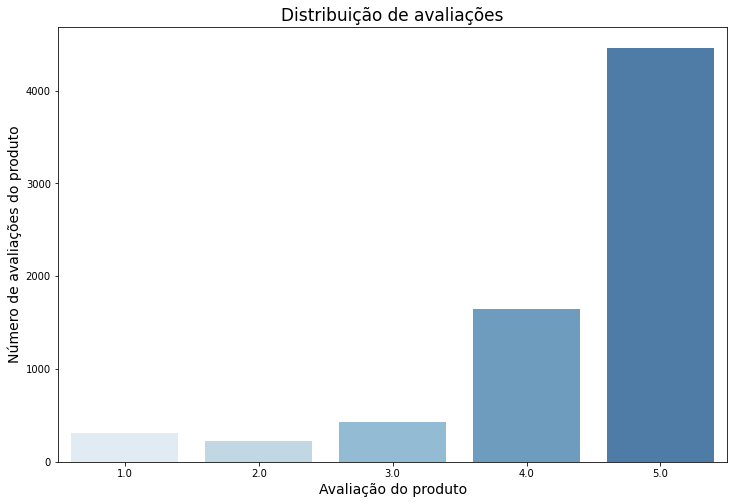

In [74]:
# colors = ["#84efe2", "#2f99ad", "#372e96", "#6b62ce"]
# customPalette = sns.set_palette(sns.color_palette(colors))
sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

top = data['reviews_rating'].value_counts().index.tolist()
value = data['reviews_rating'].value_counts().values.tolist()

plt.figure(figsize=(12,8))
sns.barplot(top, value, alpha=0.8, palette="Blues")
plt.xlabel('Avaliação do produto', fontsize=14)
plt.ylabel('Número de avaliações do produto', fontsize=14)
plt.title('Distribuição de avaliações', fontsize=17)
plt.show()

Total de revies por classificação entre ruim e bom

In [75]:
data['rating_class'].value_counts()

good    6542
bad      536
Name: rating_class, dtype: int64

In [76]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer
import re, string, unicodedata
import contractions
from contractions import CONTRACTION_MAP


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\igorS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\igorS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\igorS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [77]:
from nltk.tokenize import word_tokenize
raw_tokens=len([w for t in (data["reviews_text"].apply(word_tokenize)) for w in t])
print('Número de tokens brutos: {}'.format(raw_tokens))

Número de tokens brutos: 397623


In [78]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

# Define function to expand contractions
def expand_contractions(text):
    contractions_pattern = re.compile('({})'.format('|'.join(CONTRACTION_MAP.keys())),flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = CONTRACTION_MAP.get(match)\
                        if CONTRACTION_MAP.get(match)\
                        else CONTRACTION_MAP.get(match.lower())
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
    
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text


# special_characters removal
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

stopword_list= stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
#stopword_list.remove('headphone')
#stopword_list.remove('headphones')
#stopword_list.remove('earbuds')
#stopword_list.remove('bud')
#stopword_list.remove('ear')
#stopword_list.remove('sony')
#stopword_list.remove('product')


def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas

In [79]:
def normalize_and_lemmaize(input):
    sample = denoise_text(input)
    sample = expand_contractions(sample)
    sample = remove_special_characters(sample)
    words = nltk.word_tokenize(sample)
    words = normalize(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)

In [80]:
data['clean_text'] = data['reviews_text'].map(lambda text: normalize_and_lemmaize(text))

In [81]:
from nltk.tokenize import word_tokenize
clean_tokens=len([w for t in (data["clean_text"].apply(word_tokenize)) for w in t])
print('Número de tokens limpos: {}'.format(clean_tokens))
print('Porcentagem de tokens removidos: {0:.2f}'.format(1-(clean_tokens/raw_tokens)))

Número de tokens limpos: 181255
Porcentagem de tokens removidos: 0.54


In [82]:
data.to_csv(f'{folder_path_base}/data/clean_review.csv', sep=',', encoding='utf-8', index = False)